In [1]:
import pandas as pd
import numpy as np

In [2]:
FILE_TRAIN = 'data/pp-training.csv'
FILE_TEST = 'data/pp-testing.csv'

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [4]:
cols = ['lat','lon','surface_covered_in_m2','surface_total_in_m2','rooms','bano','property_type']
df = pd.read_csv(FILE_TRAIN, low_memory=False, usecols=(cols+['price']))

In [5]:
alldata = df
allcols = list(alldata)
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price',], axis=1),
                                                    alldata.price, test_size=0.1, random_state=0)

In [6]:
regr = RandomForestRegressor(n_jobs=-1, n_estimators=5)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.66657740135724164

In [7]:
regr = RandomForestRegressor(n_jobs=-1, n_estimators=80, random_state=0, warm_start=True)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.71230590048071663

In [8]:
from sklearn.metrics import mean_squared_error

y_predicted = regr.predict(X_test)
(mean_squared_error(y_test, y_predicted))

33078952739.137623

In [9]:
df = pd.read_csv(FILE_TEST, low_memory=False, usecols=cols)
# df = df.drop(['Unnamed: 0'], axis=1)
predicted = regr.predict(df)
predicted

array([ 395327.91666667,  539608.33333333,  144220.        , ...,
        471918.33333333,  144220.        ,  471137.5       ])

In [10]:
ids = pd.read_csv('data/properati_dataset_testing_noprice.csv')
ids = ids[['id']]
df2 = pd.DataFrame(predicted)
df3 = ids.join(df2)
df3.columns = ['id','price_usd']
df3.to_csv('data/RandomForest.csv')

Text(0.5,1,'Variable Importance')

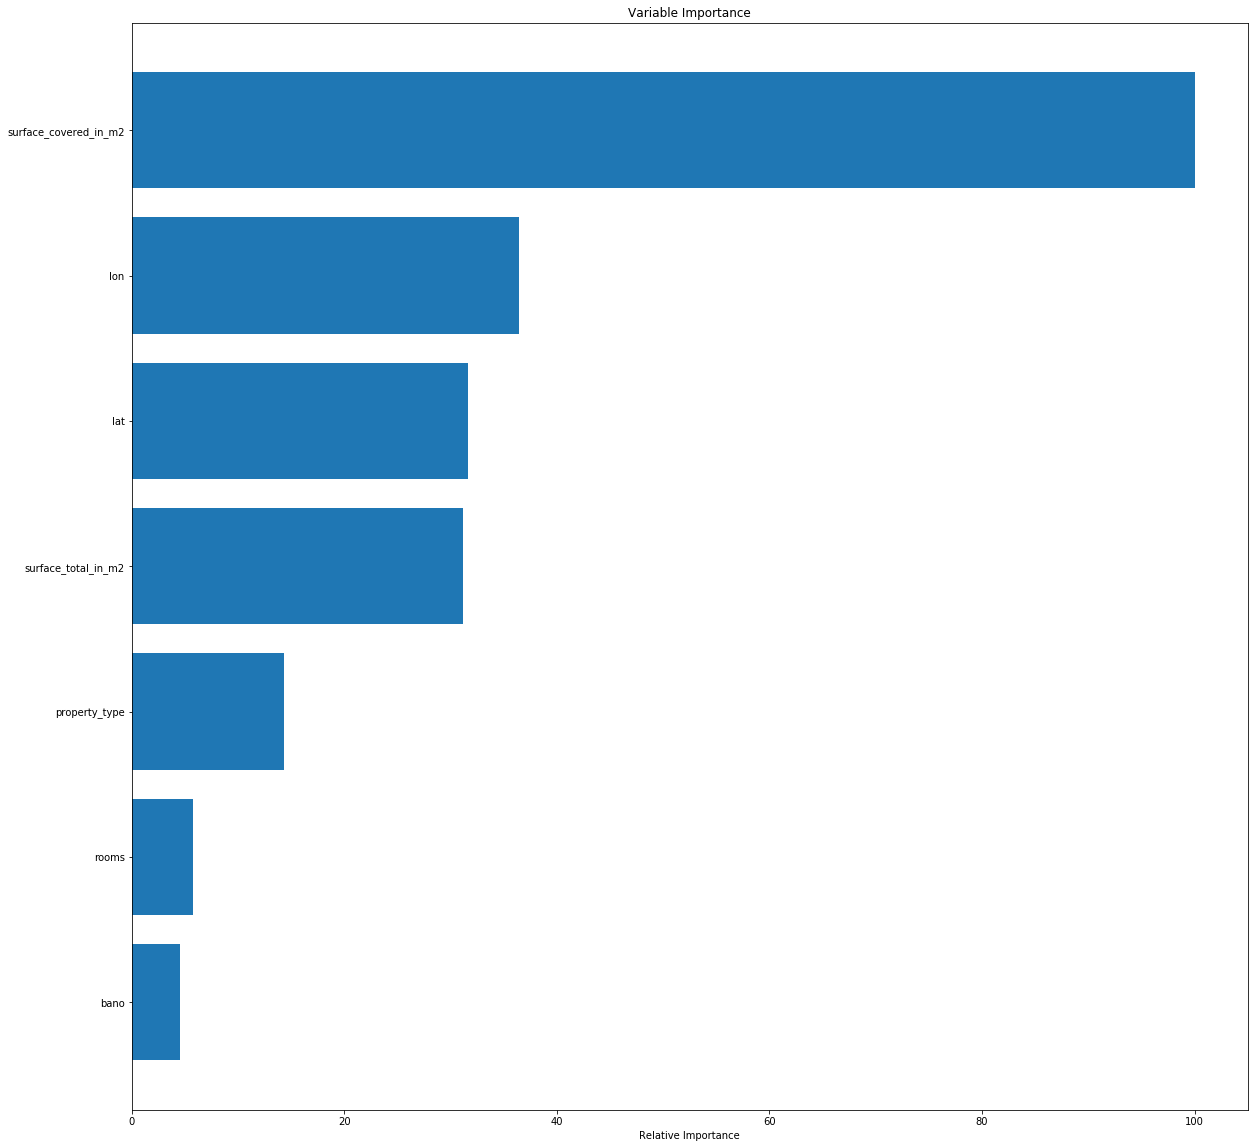

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
feature_importance = regr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X_train.columns[sorted_idx]
plt.figure(figsize=(20,20))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [ ]:

df2 = pd.read_csv(FILE_TEST, low_memory=False)
df2 = df2.drop(drops, axis=1)
predicted = regr.predict(df2)
predicted